In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='white')

In [2]:
data = pd.read_csv(filepath_or_buffer='./data/Social_Media_Engagement.csv')

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Account ID,10000.0,5000.500000,2886.895680,1.0000,2500.7500,5000.5000,7500.2500,10000.000
Follower Count,10000.0,503941.555000,286028.799845,1449.0000,257061.7500,506529.0000,749949.2500,999982.000
Posts Per Week,10000.0,3.976900,1.974274,1.0000,2.0000,4.0000,6.0000,7.000
Engagement Rate,10000.0,0.086736,0.013327,0.0642,0.0834,0.0856,0.0986,0.102
Ad Spend (USD),10000.0,527.741840,280.086676,51.9500,277.4000,517.5600,783.6000,998.200
Conversion Rate,10000.0,0.029229,0.011438,0.0101,0.0193,0.0284,0.0392,0.050
Campaign Reach,10000.0,25308.848300,14119.006672,1005.0000,13187.0000,25260.0000,37524.0000,49998.000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Account ID       10000 non-null  int64  
 1   Username         10000 non-null  object 
 2   Platform         10000 non-null  object 
 3   Follower Count   10000 non-null  int64  
 4   Posts Per Week   10000 non-null  int64  
 5   Engagement Rate  10000 non-null  float64
 6   Ad Spend (USD)   10000 non-null  float64
 7   Conversion Rate  10000 non-null  float64
 8   Campaign Reach   10000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 703.2+ KB


In [5]:
numerical_features = data.select_dtypes(include=[int, float]).columns
caterogical_features = data.select_dtypes(include=object).columns

In [6]:
numerical_features

Index(['Account ID', 'Follower Count', 'Posts Per Week', 'Engagement Rate',
       'Ad Spend (USD)', 'Conversion Rate', 'Campaign Reach'],
      dtype='object')

In [7]:
caterogical_features

Index(['Username', 'Platform'], dtype='object')

In [8]:
numerical_corr = data[numerical_features].corr()
min_corr = numerical_corr.min().min()
max_corr = numerical_corr[numerical_corr < 1].max().max()

annot_matrix = numerical_corr.round(4).astype(str)
np.fill_diagonal(annot_matrix.values, [f'{feature}' for feature in numerical_features.values])

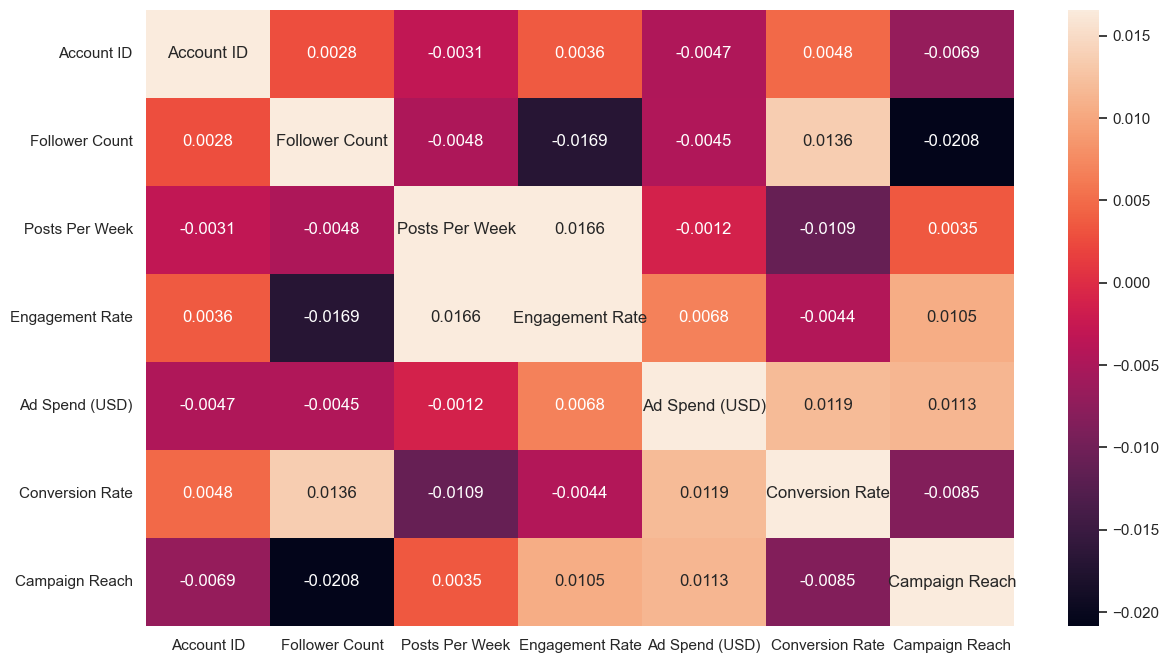

In [9]:
fig, ax = plt.subplots(figsize=(14,8))

sns.heatmap(data=numerical_corr,
            annot=annot_matrix,
            fmt='',
            vmin=min_corr,
            vmax=max_corr,
            ax=ax)
plt.show()

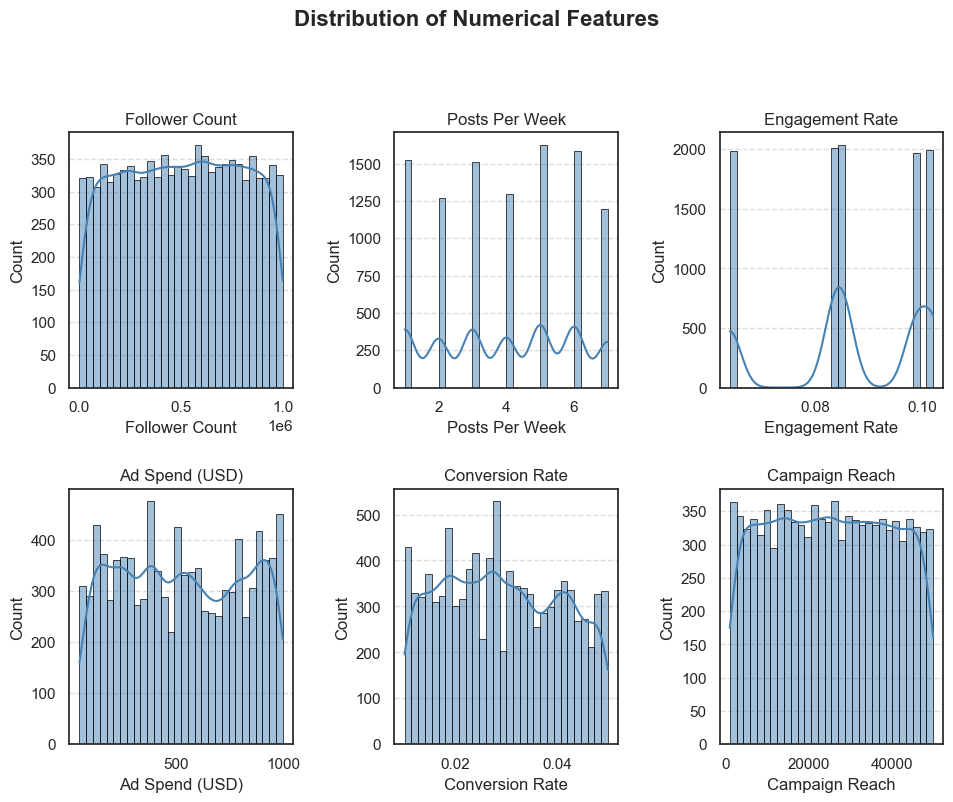

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,8))

ax = ax.flatten()
for idx, feat in enumerate(numerical_features[numerical_features != 'Account ID']):
    sns.histplot(data = data[feat],
                 ax=ax[idx],
                 kde=True,
                 bins=30,
                 color='steelblue',
                 edgecolor='black')
    
    ax[idx].set_title(feat)
    ax[idx].grid(axis='y', linestyle='--', alpha=0.7)
    
for i in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[i])

fig.suptitle("Distribution of Numerical Features", fontsize=16, fontweight="bold", y=1.02)
fig.tight_layout(pad=2.0)

In [11]:
descriptive_stats_numerical_features = {}

for idx, feature in enumerate(numerical_features[numerical_features!='Account ID']):
    series_feat = data[feature]
    
    q1 = np.nanpercentile(series_feat, 25)
    median_f = np.nanmedian(series_feat)
    q3 = np.nanpercentile(series_feat, 75)
    iqr = q3 - q1 
    lower_bound = q1 - 1.5 * iqr  
    upper_bound = q3 + 1.5 * iqr 
    
    descriptive_stats_numerical_features[feature] = dict(
        quartile_1 = q1,
        median = median_f,
        quartile_3 = q3,
        interquartile = iqr,
        lower_bound = lower_bound,
        upper_bound = upper_bound,
        
        outliers_below = (series_feat < lower_bound).sum(),
        outliers_above = (series_feat > upper_bound).sum(),
    )
descriptive_stats_numerical_features
        

{'Follower Count': {'quartile_1': np.float64(257061.75),
  'median': np.float64(506529.0),
  'quartile_3': np.float64(749949.25),
  'interquartile': np.float64(492887.5),
  'lower_bound': np.float64(-482269.5),
  'upper_bound': np.float64(1489280.5),
  'outliers_below': np.int64(0),
  'outliers_above': np.int64(0)},
 'Posts Per Week': {'quartile_1': np.float64(2.0),
  'median': np.float64(4.0),
  'quartile_3': np.float64(6.0),
  'interquartile': np.float64(4.0),
  'lower_bound': np.float64(-4.0),
  'upper_bound': np.float64(12.0),
  'outliers_below': np.int64(0),
  'outliers_above': np.int64(0)},
 'Engagement Rate': {'quartile_1': np.float64(0.0834),
  'median': np.float64(0.0856),
  'quartile_3': np.float64(0.0986),
  'interquartile': np.float64(0.015199999999999991),
  'lower_bound': np.float64(0.060600000000000015),
  'upper_bound': np.float64(0.12139999999999998),
  'outliers_below': np.int64(0),
  'outliers_above': np.int64(0)},
 'Ad Spend (USD)': {'quartile_1': np.float64(277.4),

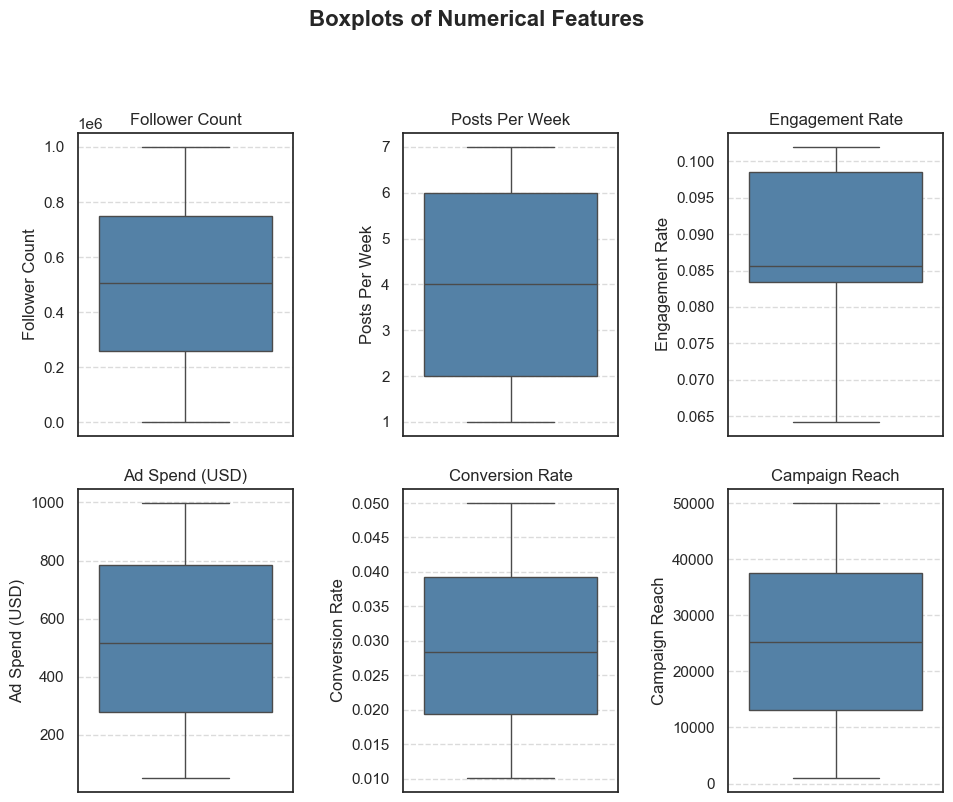

In [12]:
fig, ax = plt.subplots(nrows = 2, ncols=3, figsize=(10,8))

ax = ax.flatten()
for idx, feat in enumerate(numerical_features[numerical_features != 'Account ID']):
    sns.boxplot(data = data[feat],
                 ax=ax[idx],
                 color='steelblue')
    
    ax[idx].set_title(feat)
    ax[idx].grid(axis='y', linestyle='--', alpha=0.7)
    
for i in range(len(numerical_features), len(ax)):
    fig.delaxes(ax[i])

fig.suptitle("Boxplots of Numerical Features", fontsize=16, fontweight="bold", y=1.02)
fig.tight_layout(pad=2.0)

In [13]:
caterogical_features

Index(['Username', 'Platform'], dtype='object')

C:\Users\PC\AppData\Local\Temp\ipykernel_18128\4177341177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = data, x = 'Platform', palette='pastel')


Text(0.5, 1.0, 'Count Plot: Platform Distribution')

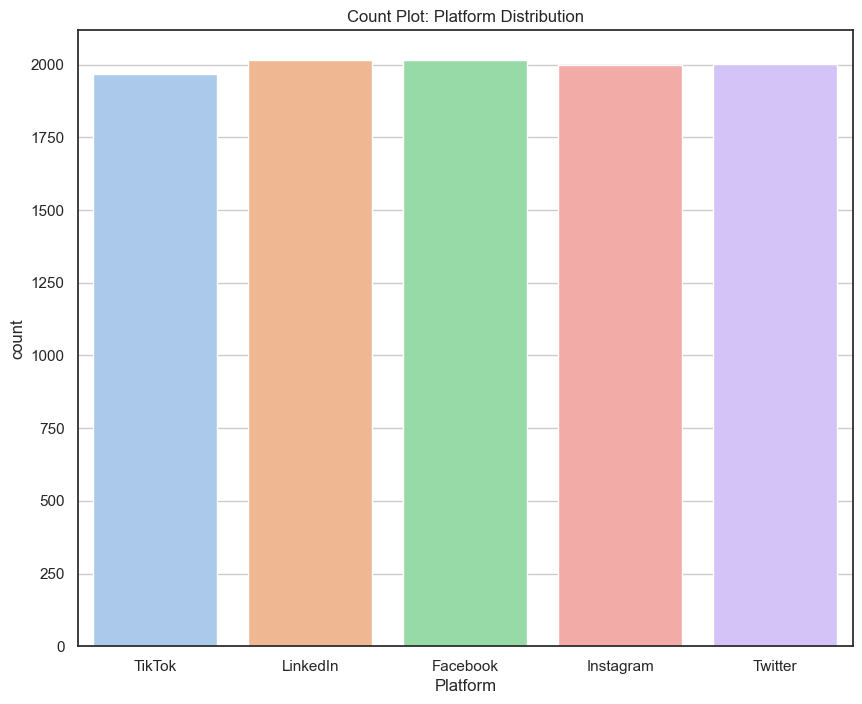

In [19]:
plt.figure(figsize=(10,8))

sns.countplot(data = data, x = 'Platform', palette='pastel')

plt.grid(True, axis='y')
plt.title('Count Plot: Platform Distribution')

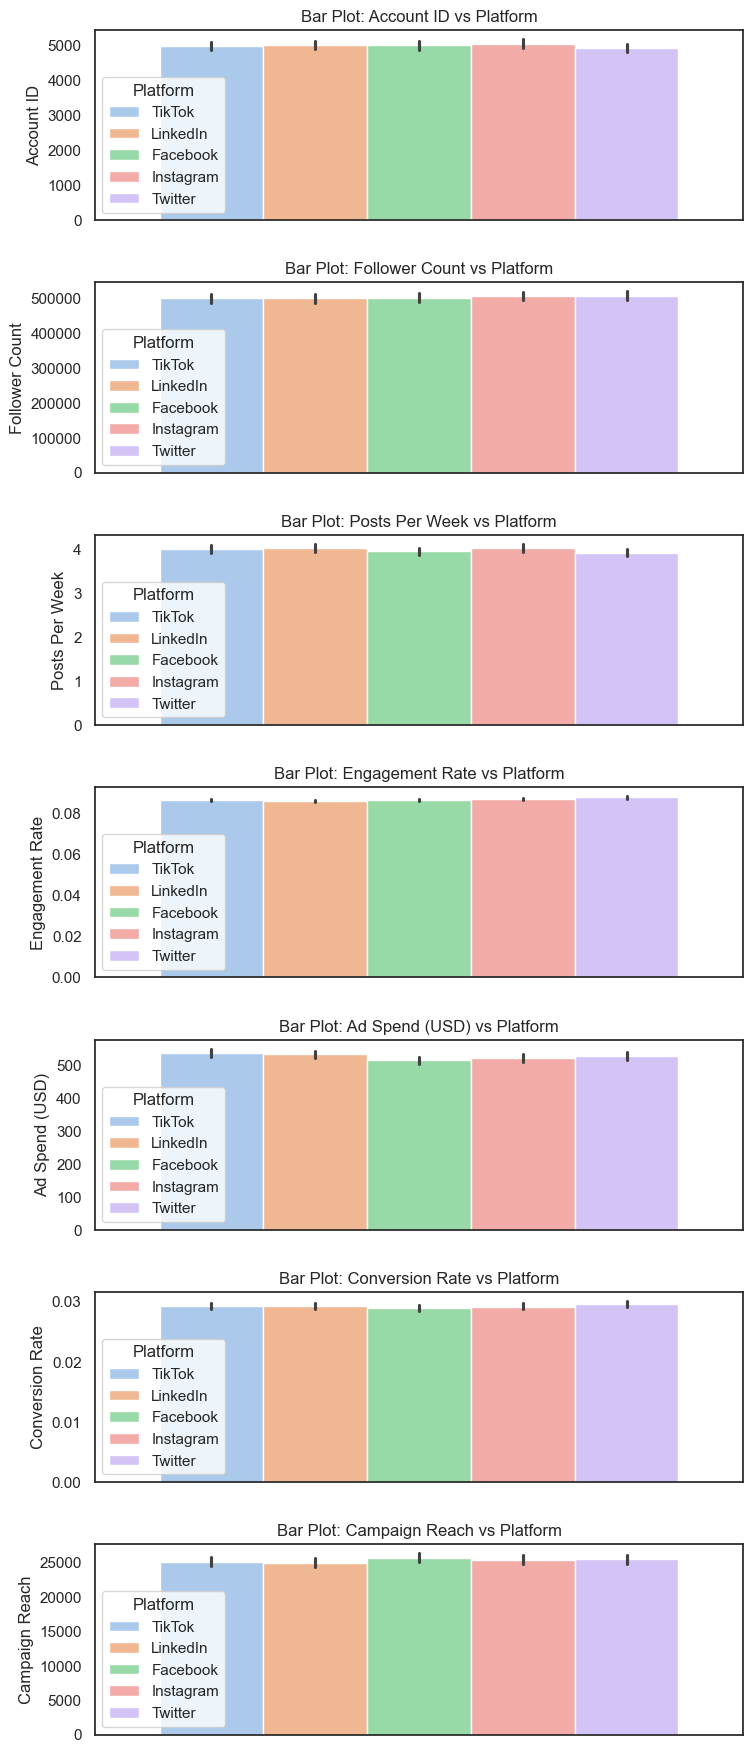

In [32]:
fig, ax = plt.subplots(len(numerical_features), 1, figsize=(8,18))

for idx, numf in enumerate(numerical_features):
    sns.barplot(data=data,
                hue = 'Platform',
                y=numf,
                palette='pastel',
                ax=ax[idx],
                estimator='mean')
    
    ax[idx].set_title(f'Bar Plot: {numf} vs Platform')

fig.tight_layout(pad=2.0)
    

In [69]:
abs_num_corr = numerical_corr.drop(index = 'Account ID',
                                   columns = 'Account ID')[(numerical_corr < 1)].abs().unstack()
sorted_corr = abs_num_corr.sort_values()[::2]
most_correlated_pairs = sorted_corr.head(5)
top_cp_df = most_correlated_pairs.reset_index()
top_cp_df


,level_0,level_1,0
0,Posts Per Week,Ad Spend (USD),0.001239
1,Campaign Reach,Posts Per Week,0.003451
2,Engagement Rate,Conversion Rate,0.004407
3,Ad Spend (USD),Follower Count,0.004547
4,Follower Count,Posts Per Week,0.004849


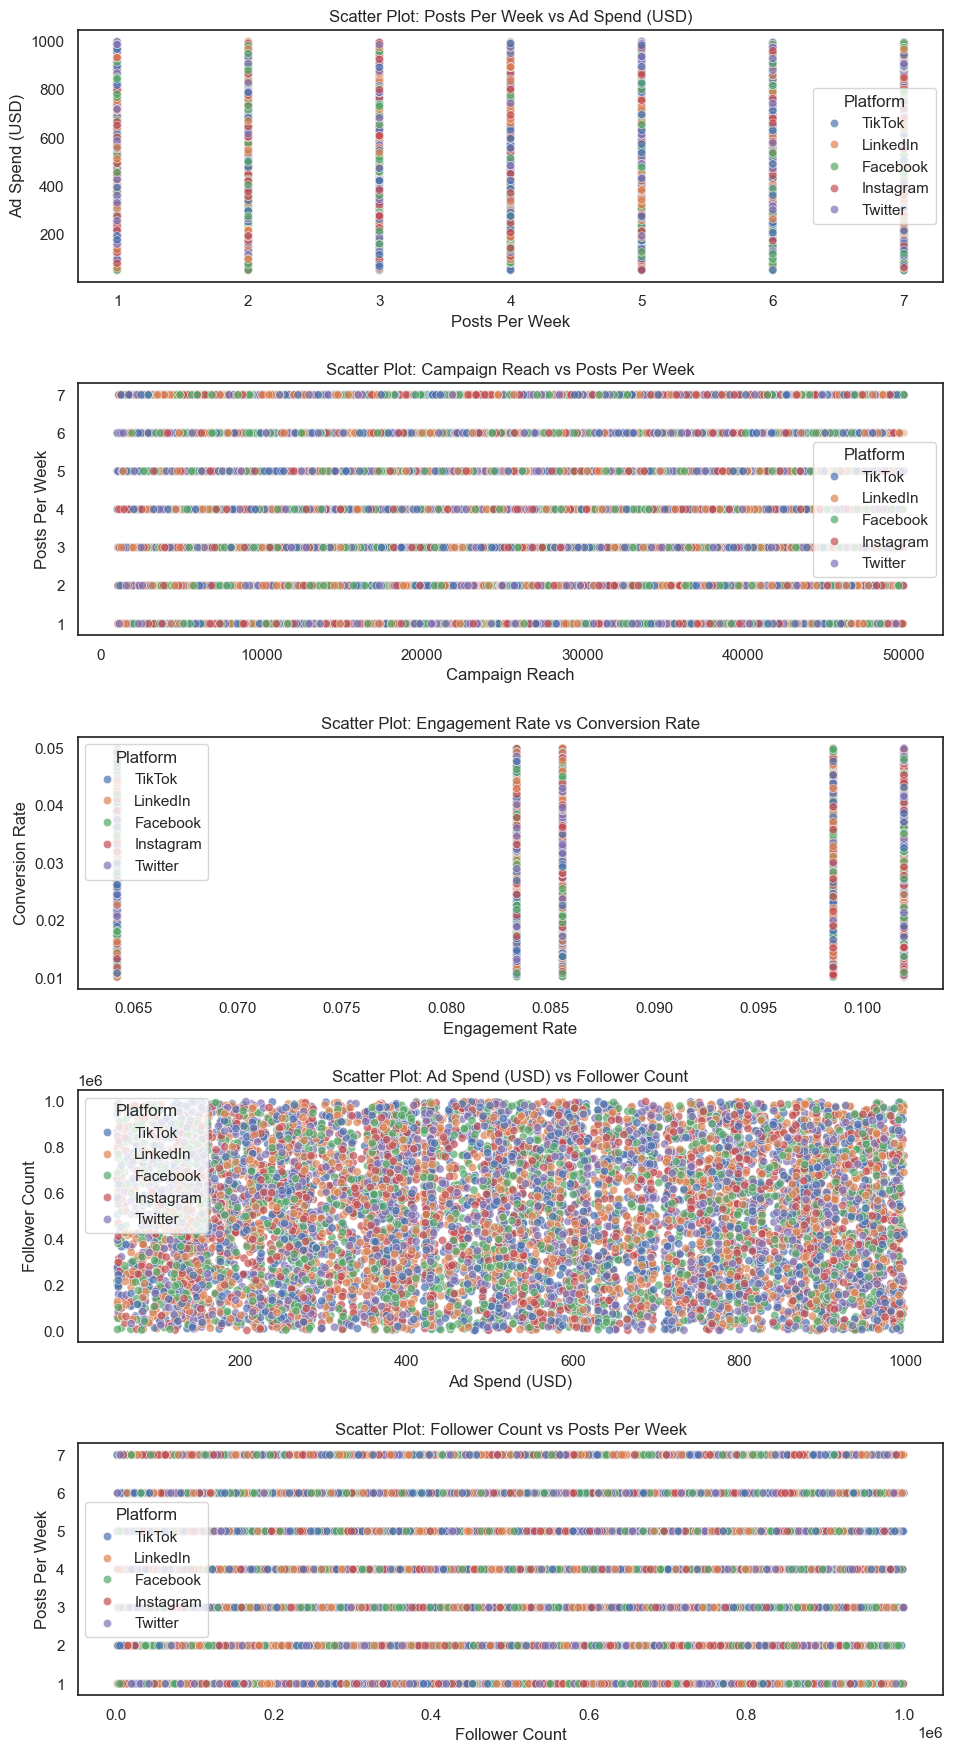

In [70]:
fig, ax = plt.subplots(nrows=top_cp_df.shape[0], ncols=1, figsize = (10,18))

for idx, (f1, f2) in enumerate(top_cp_df[['level_0', 'level_1']].values):
    
    sns.scatterplot(data=data,
                    x = data[f1],
                    y = data[f2],
                    ax=ax[idx],
                    alpha = 0.7,
                    hue='Platform')
    
    ax[idx].set_title(f'Scatter Plot: {f1} vs {f2}')
    
plt.tight_layout(pad=2.0)